# Modelados predictivos

### Autor: Perez Lopez Juan Carlos

### Definición del Problema:

**Pregunta del negocio:**

> ¿Se puede predecir si un cliente responderá positivamente (1) o no (0) a una campaña de marketing?

**Tipo de problema:**

> **Clasificación binaria supervisada**, donde la variable objetivo (**Response**) toma valores 0 o 1.

**Objetivo:**

> Desarrollar un modelo de machine learning capaz de predecir la probabilidad de respuesta de un cliente a una campaña, utilizando características como edad, ingresos, historial de compras, interacciones previas, entre otras variables disponibles.

**Valor para el negocio:**

> Poder identificar con mayor precisión qué clientes tienen mayor probabilidad de responder positivamente, permitiendo:

* Optimizar los recursos del área de marketing.
* Mejorar la tasa de conversión de las campañas.
* Reducir el costo por adquisición de clientes.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/marketing_campaign_processed.csv')
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,68,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,71,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,60,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,41,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,44,422,1,1,3,1


# Definir características (X) y objetivo (y)

In [8]:
# Suponiendo que «Respuesta» es la columna objetivo y que todas las demás columnas numéricas son características
X = data.drop('Response', axis=1)
y = data['Response']

In [9]:
# Gestiona las columnas no numéricas potenciales si aún no se han procesado
X = X.select_dtypes(include=np.number).fillna(0) # Selecciona solo las columnas numéricas y rellena los valores NaN

In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Modelo 1: Logistic Regression ---

In [11]:
log_reg = LogisticRegression(max_iter=1000) # Aumento de max_iter para la convergencia
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

--- Logistic Regression ---


In [12]:
# Evaluar el Logistic Regression
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1-score:", f1_score(y_test, y_pred_log_reg))

Confusion Matrix:
[[376   0]
 [ 67   0]]
Accuracy: 0.8487584650112867
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


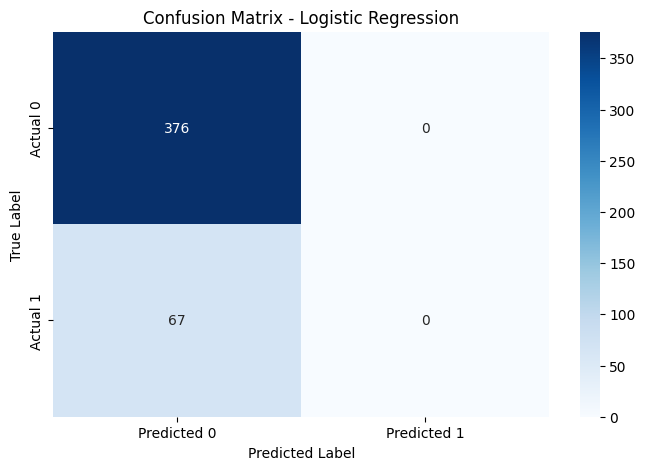

In [22]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# gráfica de la matriz de confusión
plt.figure(figsize=(8, 5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


# --- Modelo 2: Random Forest Classifier ---

In [17]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)

In [18]:
# Evaluar el Random Forest Classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_clf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf_clf))
print("Precision:", precision_score(y_test, y_pred_rf_clf))
print("Recall:", recall_score(y_test, y_pred_rf_clf))
print("F1-score:", f1_score(y_test, y_pred_rf_clf))

Confusion Matrix:
[[372   4]
 [ 43  24]]
Accuracy: 0.8939051918735892
Precision: 0.8571428571428571
Recall: 0.3582089552238806
F1-score: 0.5052631578947369


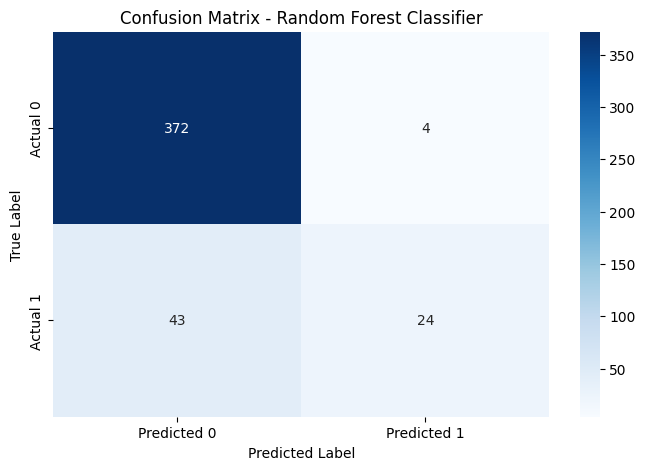

In [24]:
cm_random_forest = confusion_matrix(y_test, y_pred_rf_clf)

# gráfica de la matriz de confusión
plt.figure(figsize=(8, 5))
sns.heatmap(cm_random_forest, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

# --- Interpretación ---

##  Comparación de Resultados:

| Métrica       | Logistic Regression | Random Forest |
| :------------ | :------------------ | :------------ |
| **Accuracy**  | 0.849               | 0.894         |
| **Precision** | 0.0                 | 0.857         |
| **Recall**    | 0.0                 | 0.358         |
| **F1-score**  | 0.0                 | 0.505         |

##  Análisis:

* **La regresión logística no detectó ningún positivo correctamente**:

  * En su matriz de confusión:

    ```
    [[376   0]
     [ 67   0]]
    ```

    Predijo todo como clase **negativa**. Por eso su precision, recall y F1 son **0**.
  * Aunque su accuracy parece aceptable (0.849), es engañoso porque probablemente las clases están desbalanceadas (muchos más negativos que positivos).

* **El Random Forest sí logró detectar positivos**:

  * Matriz:

    ```
    [[372   4]
     [43  24]]
    ```

    Detectó **24 positivos correctos**, con:

    * Precision: 0.857 (cuando predice positivo, acierta un 85.7%)
    * Recall: 0.358 (detecta el 35.8% de los positivos reales)
    * F1-score: 0.505 (media armónica entre precisión y recall)

    Además, su accuracy es mayor (0.894).

## Conclusión:

**El modelo Random Forest es claramente mejor**, porque:

* Tiene mayor **precision**, **recall** y **F1-score**.
* Detecta la clase minoritaria (positivos), cosa que la regresión logística no hizo.
* Accuracy más alto, pero además **sus métricas de clasificación son consistentes**.

## exporta el archivo con las predicciones

In [25]:
# Hacer predicciones sobre el conjunto de datos completo data
data['Predicted_Response_RF'] = rf_clf.predict(X.select_dtypes(include=np.number).fillna(0))

# Mostrar las primeras filas del dataframe con la nueva columna de predicciones
print("\nDataFrame con predicciones de Random Forest:")
print(data.head())



DataFrame con predicciones de Random Forest:
   Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  Complain  Response       Customer_For  Age  Spent  \
0      88  ...         0         1  57283200000000000   68   1617   
1       1  ...         0         0   9763200000000000   71     27   
2      21  ...         0         0  26956800000000000   60    776   
3       3  ...         0         0  12009600000000000   41     53   
4      27  ...         0         0  13910400000000000   44    422   

   Living_With  Children  Family_Size  Is_Parent  Predicte

In [26]:
# Puedes guardar el dataframe actualizado si lo necesitas
data.to_csv('marketing_campaign_with_predictions.csv', index=False)
print("\nDataFrame actualizado guardado en marketing_campaign_with_predictions.csv")


DataFrame actualizado guardado en marketing_campaign_with_predictions.csv
